In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
sns.set_style('whitegrid')
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error 
import math

In [112]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Table of Contents
1. [Data Import](#Data-Import)
2. [Data Preprocessing](#Data-Preprocessing)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Data Visualization (Categorical Variables vs Response Variable)](#Categorical-and-Quantitative-Variables)
5. [Feature Engineering](#Feature-Engineering)
6. [Fitting Baseline Model](#Fitting-Baseline-Model)
7. [Feature Selection with Lasso CV](#Feature-Selection-with-Lasso-CV)
8. [Backward Selection](#Backward-Selection)
9. [Random Forest](#Random-Forest)

## Data Import

In [120]:
df_train = pd.read_csv("data/train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [121]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data Preprocessing

In [122]:
df_train_id = df_train['Id']
df_test_id = df_test['Id']
df_train.drop('Id', axis = 1, inplace = True)
df_test.drop('Id', axis = 1, inplace = True)

In [123]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [124]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Exploratory Data Analysis

- 'SalePrice' is the response variable that we need to predict.
- From the below analysis, we can observe that the response variable is right skewed. Since (linear) models are likes normal distribution, we need to transform the variable to approximate it to normal distribution.

Text(0.5, 1.0, 'SalePrice distribution')

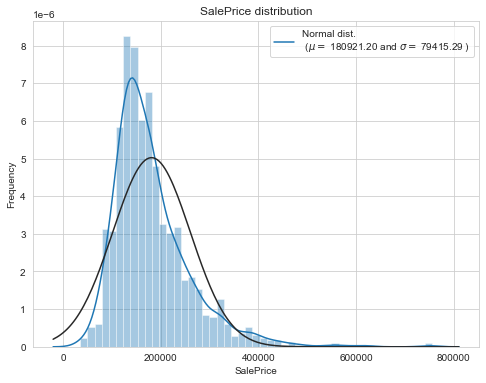

In [125]:
from scipy import stats
from scipy.stats import norm



#Estimating the distribution parameters (here, mu and sigma)
(mu, sigma) = norm.fit(df_train['SalePrice'])

#Plotting the histogram
plt.figure(figsize=(8,6))
sns.distplot(df_train['SalePrice'] , fit=norm);
# plt.show()
#Adding attributes to the plot/graph
plt.legend(['Normal dist.\n ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
# plt.show()

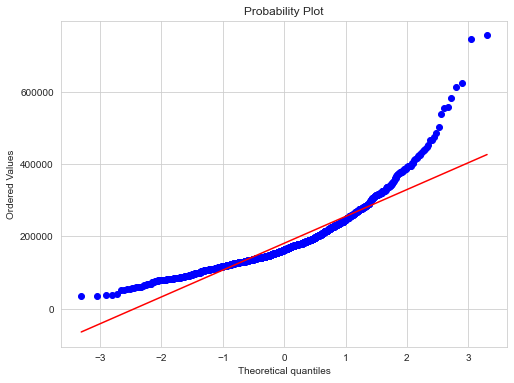

In [126]:
#The QQ-plot
fig = plt.figure(figsize=(8,6))
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

### Log-transformation of the response variable
- With the log(1+x) transformation, the skew disappears from the distribution thereby making the response variable distribution to be normal distribution.

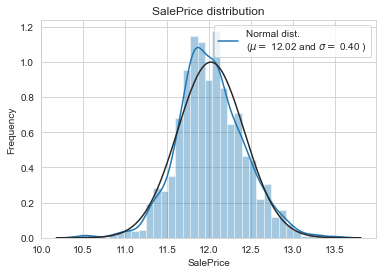

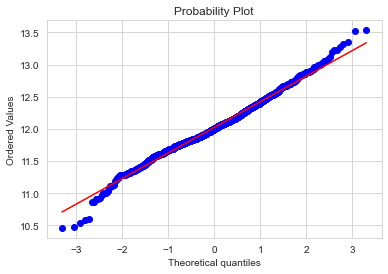

In [127]:
#Using the numpy fuction 'log1p' that applies log(1+x) to all elements of the input column
df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

#Estimating the distribution parameters (here, mu and sigma)
(mu, sigma) = norm.fit(df_train['SalePrice'])

#Plotting the histogram (new distribution)
sns.distplot(df_train['SalePrice'] , fit=norm);

#Adding attributes to the plot/graph
plt.legend(['Normal dist.\n($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#The QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

##### Missing data analysis
- We shall try to combine both the test and train datasets in order to holistically look at the entire dataset to evaluate the amount of missing information.

In [130]:
df_train_na = (df_train.isnull().sum() / len(df_train)) * 100
df_train_na = df_train_na.drop(df_train_na[df_train_na == 0].index).sort_values(ascending=False)[:30]
df_missing_data = pd.DataFrame({'Missing Ratio' :df_train_na})
df_missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Text(0.5, 1.0, 'Percent Missing data by Feature')

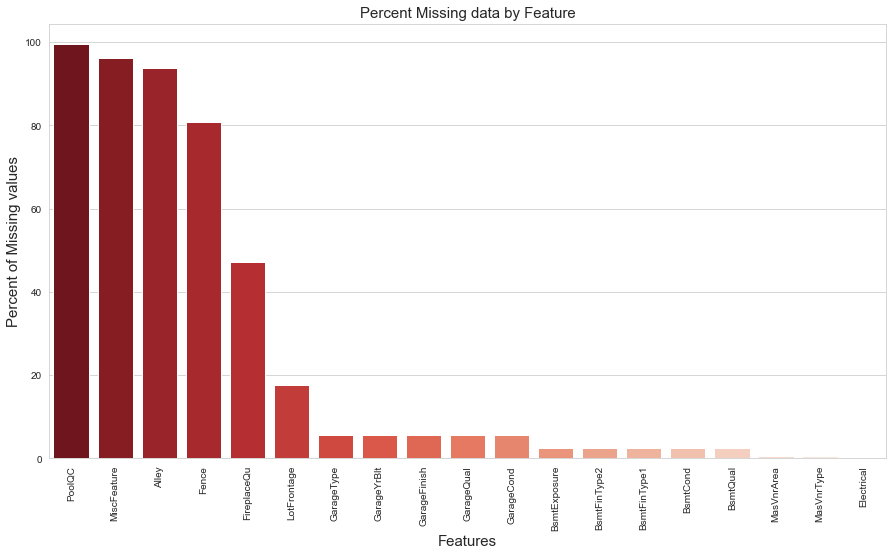

In [131]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation='90')
sns.barplot(x=df_train_na.index, y=df_train_na, palette='Reds_r')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of Missing values', fontsize=15)
plt.title('Percent Missing data by Feature', fontsize=15)

In [132]:
# removing top 5 missing data columns
df_train = df_train.loc[:,~df_train.columns.isin(df_missing_data.index[:5].values)]

In [133]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429220


# Categorical and Quantitative Variables

In [134]:
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

In [135]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

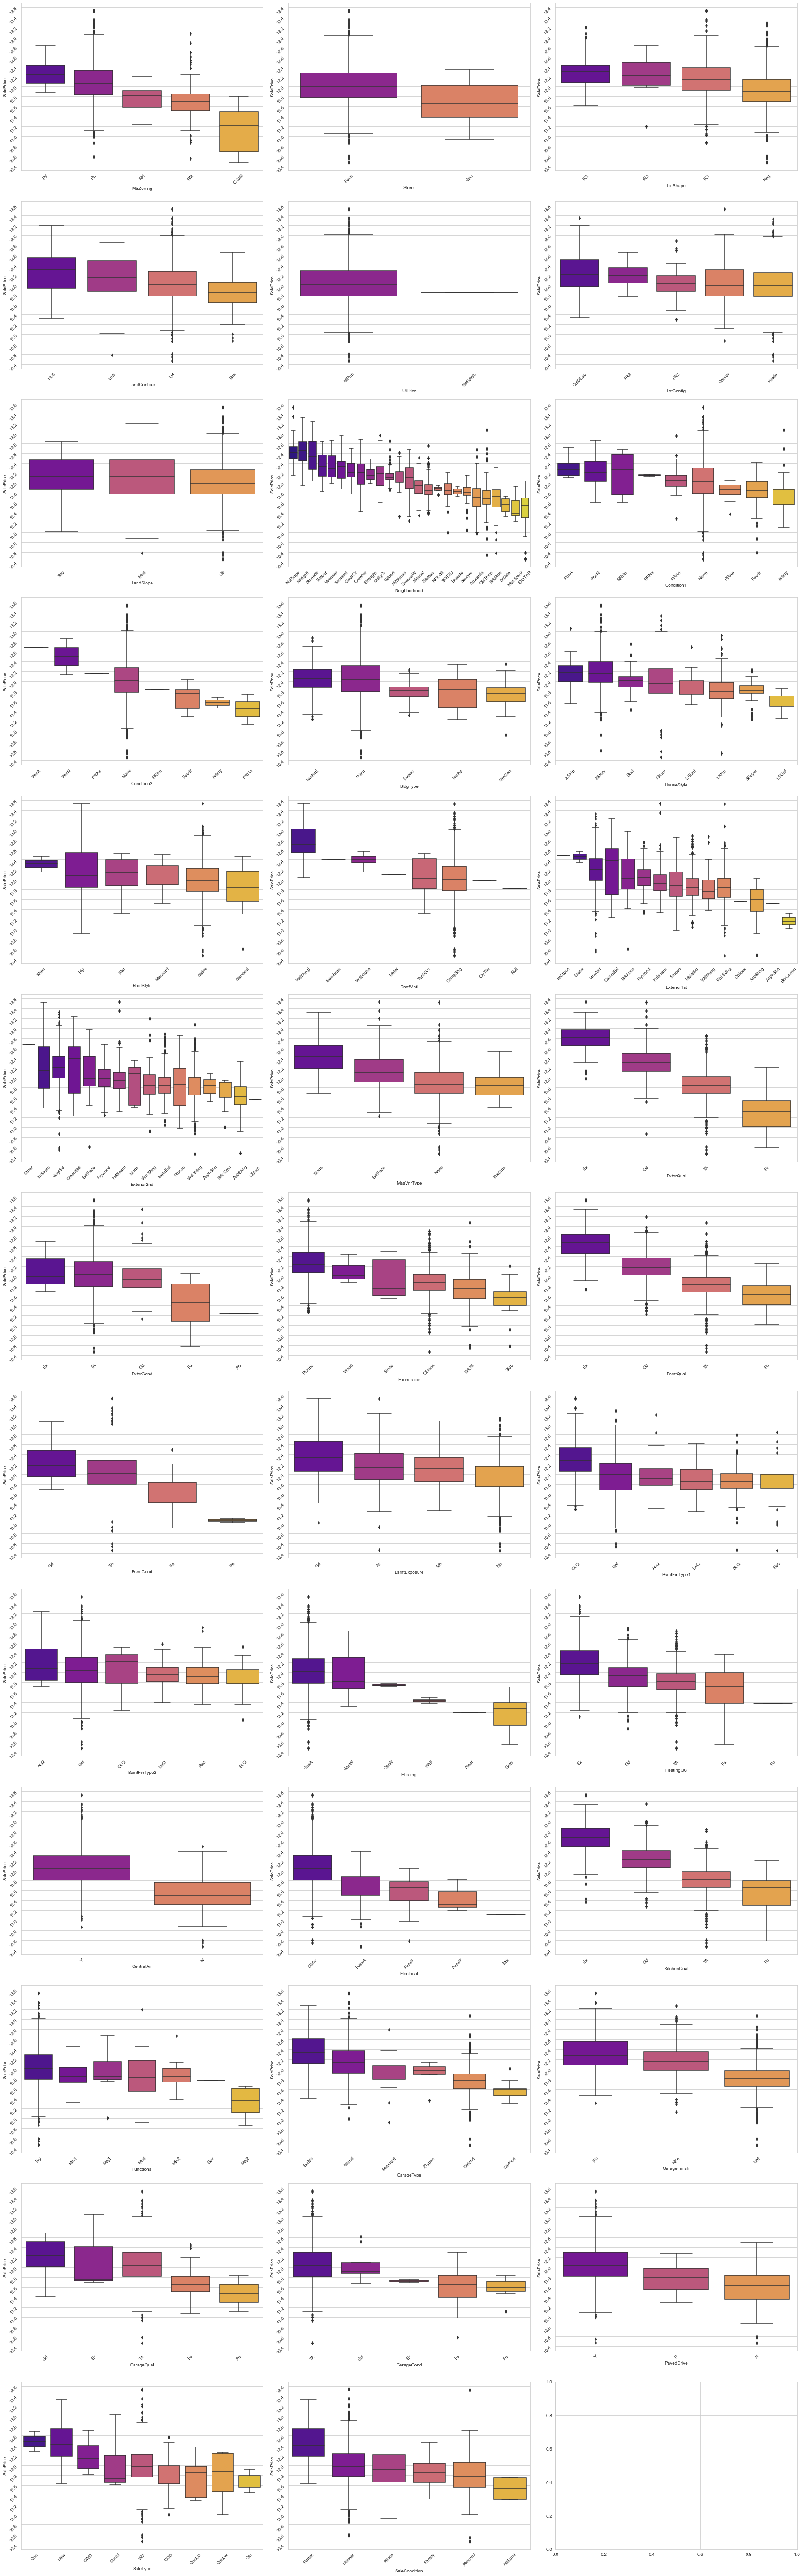

In [136]:
# Data visualization for categorical variables

fig, axes = plt.subplots(13, 3, figsize=(25, 80))
axes = axes.flatten()

for each_col, each_axes in zip(df_train.select_dtypes(include=['object']).columns, axes):

    temp = df_train.groupby([each_col])['SalePrice'].mean().sort_values(ascending=False)
    
    sns.boxplot(x = each_col,
                y = 'SalePrice',
                data = df_train,
                palette = 'plasma',
                order = temp.index,
                ax = each_axes)
    
    each_axes.tick_params(labelrotation=45)
    each_axes.yaxis.set_major_locator(MaxNLocator(nbins=18))
    plt.tight_layout()

# Feature Engineering

# Correlation Matrix

<AxesSubplot:>

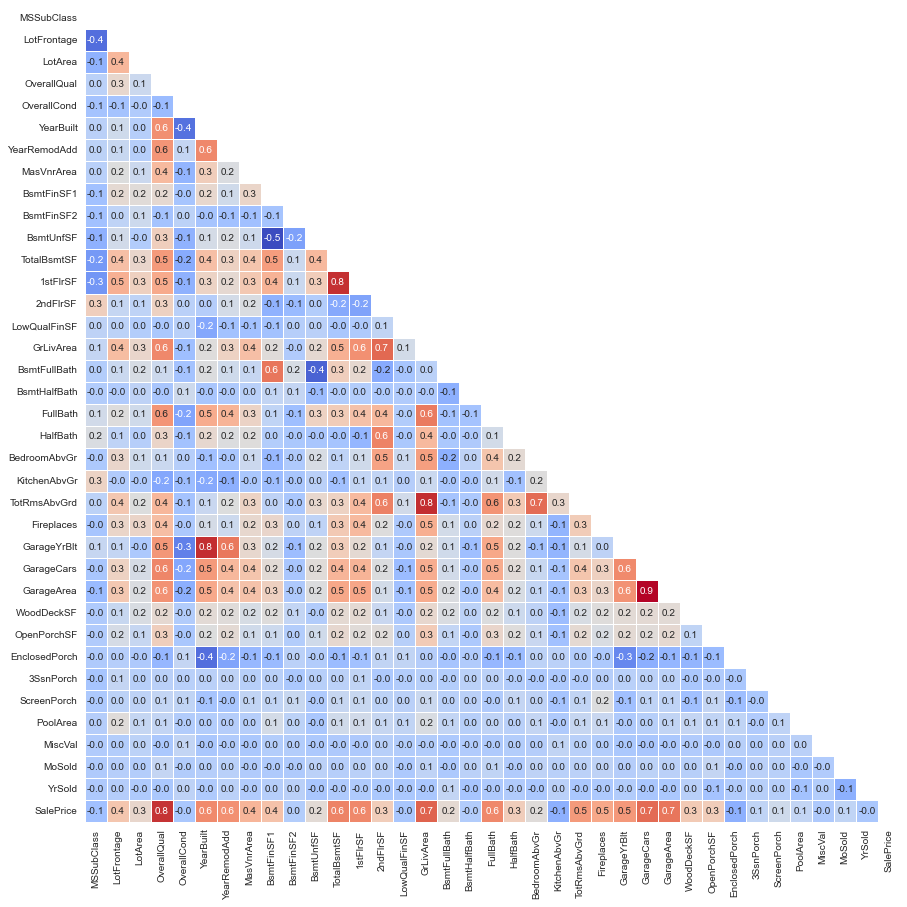

In [137]:
#Correlation map to see how features are correlated with SalePrice

Corr_Matrix = df_train.corr()
plt.subplots(figsize=(15,15))
mask = np.triu(Corr_Matrix.corr())
sns.heatmap(Corr_Matrix,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

### Missing Data Imputation

In [138]:
# List of 'NaN' including columns where NaN's mean's none.
cols_none = [ 'GarageType','GarageFinish', 'GarageQual',
             'GarageCond', 'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

# List of 'NaN' including columns where NaN's mean's 0.
cols_zero = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath','BsmtHalfBath', 'GarageYrBlt',
             'GarageArea', 'GarageCars', 'MasVnrArea']

# List of 'NaN' including columns where NaN's actually missing gonna replaced with mode.
cols_mode = ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual','SaleType', 'Utilities', 'MSZoning']

# List of 'NaN' including columns where NaN's actually missing gonna replaced most common type of the related
cols_regg = ['LotFrontage']

# Transforming rare values(less than 10) into one group.
others = ['Condition1', 'Condition2', 'RoofMatl', 'Exterior1st', 'Exterior2nd','Heating', 'Electrical',
          'Functional', 'SaleType']

In [139]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [140]:
imp = ColumnTransformer(
    transformers=[
        # simple imputation
        ('none_imputer', SimpleImputer(fill_value= 'none', strategy='constant'), cols_none),
        ('zero_imputer', SimpleImputer(fill_value= 0, strategy='constant'), cols_zero),
        ('most_imputer', SimpleImputer(strategy='most_frequent'), cols_mode),
        
        # experimental class imputation => Multivariate feature imputation
        ('regg_features', IterativeImputer(max_iter=10, random_state=0), cols_regg),
    ],
    remainder = 'passthrough',
)

imp_col = cols_none + cols_zero + cols_mode
imp_col = imp_col + [each_cols for each_cols in df_train.columns if each_cols not in imp_col]

df_train = pd.DataFrame(
    imp.fit_transform(df_train),
    columns = imp_col)
df_train = df_train.convert_dtypes()

for col in others:
    mask = df_train[col].isin(
        df_train[col].value_counts()[df_train[col].value_counts() < 10].index)
    df_train[col][mask] = col+'_Other'

In [141]:
(df_train.isna().sum() > 1).sum()

0

### Label Encoding
- MSSubClass
- OverallCond
- YrSold
- MoSold

In [142]:
from sklearn.preprocessing import LabelEncoder

In [143]:
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_train['OverallCond'] = df_train['OverallCond'].astype(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

In [144]:
# cols_for_labencode = ( 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond','ExterQual', 'ExterCond',
#         'HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional',
#         'BsmtExposure', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street',
#         'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', "GarageType", "MasVnrType", "SaleCondition")

# for each_col in cols_for_labencode:
#     df_train[each_col] = LabelEncoder().fit(list(df_train[each_col].values)).transform(list(df_train[each_col].values))

### New Features

In [145]:
sale_price = df_train['SalePrice']

In [146]:
df_test = df_test.drop(columns = ['PoolQC','MiscFeature','Fence','Alley','FireplaceQu'])

In [147]:
df_train = df_train.loc[:, ~df_train.columns.isin(['SalePrice'])]

df_train = pd.concat([df_train, df_test])

In [148]:
df_train['TotalSF'] = df_train['TotalBsmtSF'] + df_train['1stFlrSF'] + df_train['2ndFlrSF']
df_train.shape

(2919, 75)

#### Dummy categorical variables

In [154]:
# TODO: get categorical variable name from data desc kaggle

categ_cols = ["MSZoning", "Street", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope",
"Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "OverallCond",
"RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation",
"BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir",
"Electrical", "KitchenQual", "Functional", "GarageType", "GarageFinish", "GarageQual","GarageCond", "PavedDrive",
"SaleType", "SaleCondition"]

df_train['OverallCond'] = np.where(df_train['OverallCond'].astype(str).astype(int).values >= 8, "OC_Good", "OC_Bad")

df_train['OverallQual'] = np.where(df_train['OverallQual'].astype(str).astype(int).values >= 8, "OQ_Good", "OQ_Bad")

### handling quality related categorical variable

qual_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
             "BsmtExposure", "GarageQual", "GarageCond", "KitchenQual", "HeatingQC"]

for c in qual_cols:
    df_train[c] = np.where(df_train[c].isin(['Ex','Gd', 'Av']), c+'Good', c+'bad')

In [155]:
    
df_train_final=df_train.copy()

for i in categ_cols:
    df_train_final=pd.concat([df_train_final,pd.get_dummies(df_train_final[i]).iloc[:,:-1]], axis=1).drop(i, axis=1)

In [156]:
df_train_final.shape

(2919, 212)

In [157]:
df_train_final.iloc[1460:, : ].to_csv("./data/new_test.csv", index=False)

In [158]:
df_train_final = df_train_final.iloc[:1460, : ]

In [159]:
df_train_final[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','MoSold','YrSold']] = df_train_final[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','MoSold','YrSold']].astype(str).astype(float)

for c in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt','MoSold','YrSold']:
    df_train_final[c] = ((df_train_final[c] - df_train_final[c].min() )/ (df_train_final[c].max() - df_train_final[c].min()))

In [160]:
df_train_final['SalePrice'] = sale_price

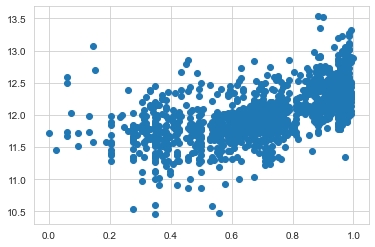

In [161]:
plt.scatter(df_train_final['YearBuilt'].values.ravel(),np.asarray(df_train_final['SalePrice'].values,dtype= float ))

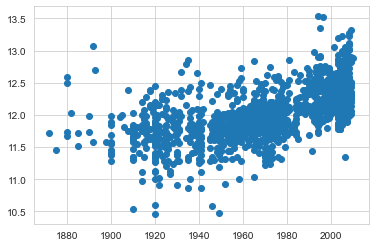

In [162]:
plt.scatter(df_train.iloc[:1460, :]['YearBuilt'] , sale_price)

In [163]:
df_train_final.shape

(1460, 213)

In [164]:
df_train_final.shape

(1460, 213)

In [165]:
def calculate_metrics(y_train_final, y_pred):
    print("The R2 score for the model is: {}".format(r2_score(y_train_final, y_pred)))

    bias = np.mean(y_pred - y_train_final)
    print("Bias for the model is: {}".format(math.e**(bias) -1 ))

    print("Mean Squared  Error {}".format(mean_squared_error(y_train_final, y_pred)))
    print("Mean Absolute Error {}".format(mean_absolute_error(y_train_final, y_pred)))
    print("Mean Absolute Percentage Error {}".format(mean_absolute_percentage_error(y_train_final, y_pred)))


# Feature Scaling

In [166]:
cols = df_train_final.iloc[:,:-1].columns.values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = df_train_final['SalePrice']
X_train_final = scaler.fit_transform(df_train_final.iloc[:,:-1])

df_train_final = pd.DataFrame(X_train_final, columns=cols)
df_train_final['SalePrice'] = sale_price

# Fitting Baseline Model

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     72.23
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:36:33   Log-Likelihood:                 1034.2
No. Observations:                1460   AIC:                            -1704.
Df Residuals:                    1278   BIC:                            -742.3
Df Model:                         181                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0241      0.003   3607.304      0.0

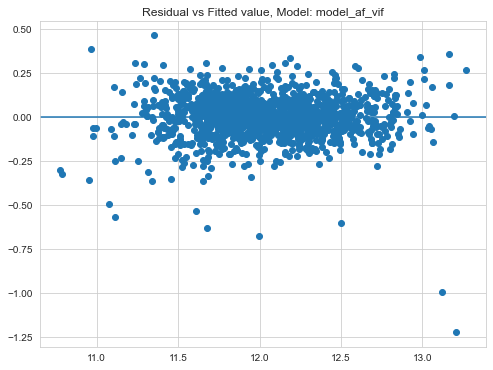

In [167]:
dictionary_cols = dict(zip(df_train_final.loc[:,~df_train_final.columns.isin(['SalePrice'])].columns.values, ["a" +str(i) for i in range(df_train_final.shape[1]-1)]))

df_train_final = df_train_final.rename(columns = dictionary_cols)

df_train_final = df_train_final.astype(str).astype(float)



model = smf.ols("SalePrice~" + "+".join(dictionary_cols.values()),df_train_final).fit()
print(model.summary())

plt.figure(figsize=(8,6))
plt.title("Residual vs Fitted value, Model: model_af_vif")
plt.axhline()
plt.scatter(model.predict(),model.resid)

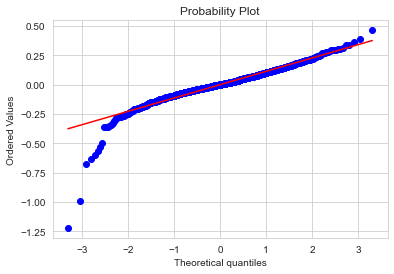

In [55]:
fig = plt.figure()
res = stats.probplot(model.resid, plot=plt)
plt.show()

In [56]:
# data for further models
X_train_final = df_train_final.loc[:, ~df_train_final.columns.isin(['SalePrice'])]
y_train_final = df_train_final.loc[:, 'SalePrice']

In [57]:
y_pred = model.predict() 
calculate_metrics(y_train_final, y_pred)

The R2 score for the model is: 0.9109484029213712
Bias for the model is: -3.885780586188048e-15
Mean Squared  Error 0.01419931584506572
Mean Absolute Error 0.08322830495203562
Mean Absolute Percentage Error 0.006956094866385374


# Removing Outlier

In [97]:
print(C[C>1].shape)

(3,)


(115,)
[ 332  944 1298]
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     87.51
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        03:46:03   Log-Likelihood:                 1153.0
No. Observations:                1457   AIC:                            -1946.
Df Residuals:                    1277   BIC:                            -994.9
Df Model:                         179                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0179      0

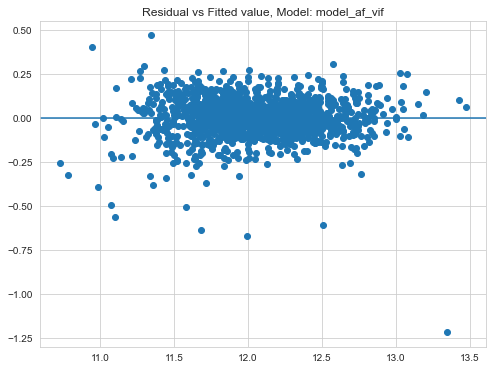

In [58]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence
inf = influence(model)

# cooks_distance is an attribute of incluence, here C
C, P = inf.cooks_distance

# since only few data points remain after cooks distance criterion we need to do further investigation
print(C[C>(4/C.shape[0])].shape)

print(C[C>1].index.values)

df_train_final = df_train_final.iloc[~df_train_final.index.isin(C[C>1].index.values), :]

model1 = smf.ols("SalePrice~" + "+".join(dictionary_cols.values()),df_train_final).fit()
print(model1.summary())
plt.figure(figsize=(8,6))
plt.title("Residual vs Fitted value, Model: model_af_vif")
plt.axhline()
plt.scatter(model1.predict(),model1.resid)



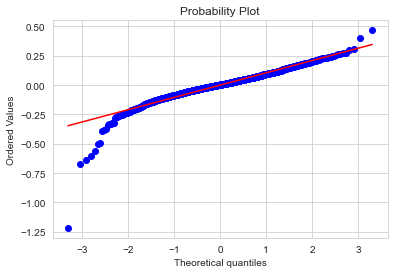

In [59]:
fig = plt.figure()
res = stats.probplot(model1.resid, plot=plt)
plt.show()

In [60]:
y_pred = model1.predict() 
calculate_metrics(df_train_final['SalePrice'], y_pred)

The R2 score for the model is: 0.9246247471185413
Bias for the model is: 2.6423307986078726e-14
Mean Squared  Error 0.012026673413162277
Mean Absolute Error 0.07692115035988613
Mean Absolute Percentage Error 0.006441792230843865


# Checks for multi-colinearity

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_train_final = df_train_final.astype(float)

X = add_constant(df_train_final)
vif = pd.DataFrame([variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))], columns=['VIF'])

print(vif)

vif['VIF'] = np.where(vif['VIF'] == np.inf, 999, vif['VIF'])

vif['features'] = X.columns

vif.columns

other_factor_vif = 1/(1-model.rsquared_adj)
threshold = max(10, other_factor_vif)

after_vif_cols=vif.loc[vif['VIF']<threshold]['features'].values.tolist()

after_vif_cols.append("SalePrice")
print(after_vif_cols)
# dictionary_cols

df_train_final = df_train_final.loc[:,df_train_final.columns.isin(after_vif_cols)]

C:\Users\Sameer Kataria\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\Sameer Kataria\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


           VIF
0          inf
1          inf
2          inf
3          inf
4     2.846958
..         ...
208   3.008149
209   6.177127
210   8.879723
211  84.759133
212  13.266954

[213 rows x 1 columns]
['a4', 'a5', 'a7', 'a8', 'a9', 'a10', 'a12', 'a14', 'a19', 'a20', 'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30', 'a31', 'a32', 'a33', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40', 'a41', 'a42', 'a43', 'a44', 'a45', 'a46', 'a47', 'a48', 'a49', 'a50', 'a53', 'a54', 'a55', 'a56', 'a57', 'a59', 'a62', 'a63', 'a64', 'a66', 'a67', 'a68', 'a69', 'a71', 'a72', 'a73', 'a75', 'a76', 'a92', 'a93', 'a94', 'a95', 'a96', 'a98', 'a99', 'a101', 'a102', 'a103', 'a106', 'a108', 'a126', 'a142', 'a119', 'a136', 'a138', 'a126', 'a142', 'a132', 'a134', 'a136', 'a138', 'a141', 'a145', 'a146', 'a151', 'a152', 'a153', 'a154', 'a171', 'a196', 'a173', 'a174', 'a175', 'a177', 'a178', 'a179', 'a181', 'a182', 'a183', 'a194', 'a195', 'a196', 'a197', 'a198', 'a206', 'a208', 'a209', 'a210', 'SalePri

In [98]:
len(after_vif_cols)

108

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     93.38
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        03:46:09   Log-Likelihood:                 833.49
No. Observations:                1457   AIC:                            -1447.
Df Residuals:                    1347   BIC:                            -865.7
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0172      0.004   3231.237      0.0

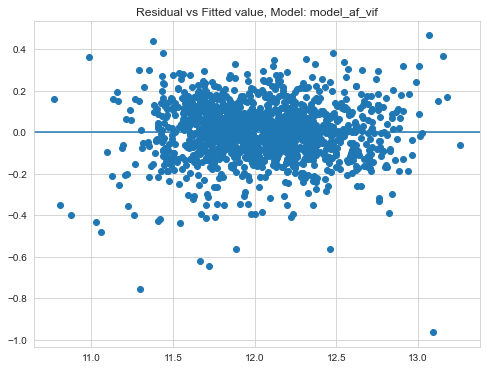

In [62]:
df_train_final['SalePrice'] = df_train_final['SalePrice'].astype(float)

model_af_vif = smf.ols("SalePrice~" + "+".join(df_train_final.loc[:,~df_train_final.columns.isin(['SalePrice'])].columns.values),df_train_final).fit()
print(model_af_vif.summary())

plt.figure(figsize=(8,6))
plt.title("Residual vs Fitted value, Model: model_af_vif")
plt.axhline()
plt.scatter(model_af_vif.predict(),model_af_vif.resid)

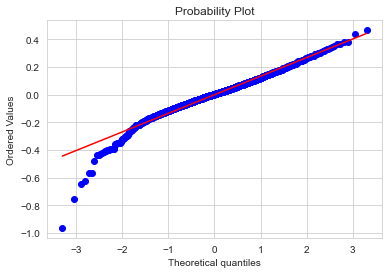

In [63]:
fig = plt.figure()
res = stats.probplot(model_af_vif.resid, plot=plt)
plt.show()

In [64]:
y_pred = model_af_vif.predict() 
calculate_metrics(df_train_final['SalePrice'], y_pred)

The R2 score for the model is: 0.8831237427588379
Bias for the model is: -7.771561172376096e-16
Mean Squared  Error 0.01864846248413669
Mean Absolute Error 0.10059368400934517
Mean Absolute Percentage Error 0.008405139848719658


### Partial F Test

In [65]:
from statsmodels.stats.anova import anova_lm
anova_lm(model_af_vif, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1347.0,27.170810,0.0,NaN,NaN,NaN
1,1278.0,20.731001,69.0,6.439809,5.753531,5.377967e-40


In [66]:
# sns.pairplot(df_train)

# Feature Selection with Lasso CV

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     137.6
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        03:46:12   Log-Likelihood:                 741.62
No. Observations:                1460   AIC:                            -1349.
Df Residuals:                    1393   BIC:                            -995.1
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0241      0.004   3082.252      0.0

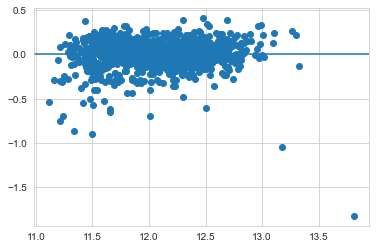

In [67]:
from sklearn.linear_model import LassoCV


df_train_lasso = X_train_final.copy()
df_train_lasso['SalePrice'] = y_train_final.values

reg = LassoCV(cv=20, random_state=0, selection='random', normalize=True).fit(X_train_final, y_train_final)
reg.score(X_train_final, y_train_final)

cols_lasso = []
for i, j in zip(reg.coef_, X.columns):
    if i > 0 :
        cols_lasso.append(j)

X_train_final.loc[:,X_train_final.columns.isin(cols_lasso)].columns.values

model_af_lasso = smf.ols("SalePrice~" + "+".join(X_train_final.loc[:,X_train_final.columns.isin(cols_lasso)].columns.values),df_train_lasso).fit()
print(model_af_lasso.summary())

plt.axhline(model_af_lasso.resid.mean())
plt.scatter(model_af_lasso.predict(),model_af_lasso.resid)

In [99]:
model_af_lasso.params

Intercept    12.024057
a4            0.020697
a5            0.006524
a6            0.015546
a7            0.000849
               ...    
a186          0.019623
a191          0.005587
a194          0.014752
a204          0.008507
a206          0.002851
Length: 68, dtype: float64

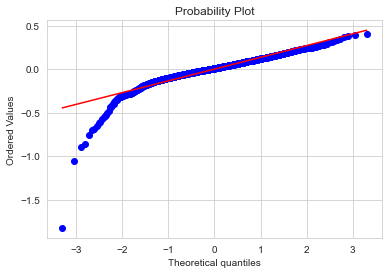

In [68]:
fig = plt.figure()
res = stats.probplot(model_af_lasso.resid, plot=plt)
plt.show()

In [69]:
y_pred = model_af_lasso.predict() 
calculate_metrics(y_train_final, y_pred)


The R2 score for the model is: 0.8670491250223928
Bias for the model is: -6.439293542825908e-15
Mean Squared  Error 0.021199074779288146
Mean Absolute Error 0.09798553110776023
Mean Absolute Percentage Error 0.008215216286548147


###  Partial F test / Testing subset of coeff 

In [70]:
"""
from the results below we can infer 
"""

'\nfrom the results below we can infer \n'

In [71]:
from statsmodels.stats.anova import anova_lm

anova_lm(model_af_lasso, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1393.0,30.950649,0.0,NaN,NaN,NaN
1,1278.0,20.731001,115.0,10.219648,5.478336,3.407879e-55


# Backward Selection

In [90]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(normalize=True, n_jobs = -1),
          k_features="best",
          forward=False,
          floating=False,
          scoring = 'r2',
          cv = 5)

sfs.fit(X_train_final, y_train_final)

sfs_feature = [x for x in sfs.k_feature_idx_]

In [91]:
df_train_backward = X_train_final.copy()
df_train_backward['SalePrice']  = y_train_final.values

In [92]:
model_backward = smf.ols("SalePrice~" + "+".join(X_train_final.iloc[:,sfs_feature].columns.values),df_train_backward).fit()
print(model_backward.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     157.4
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:21:11   Log-Likelihood:                 941.33
No. Observations:                1460   AIC:                            -1725.
Df Residuals:                    1381   BIC:                            -1307.
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0241      0.003   3518.800      0.0

In [100]:
r=model_backward.summary()

In [103]:
result_csv = r.as_csv()

In [109]:
with open('summary_model_backward.txt', 'w') as fh:
    fh.write(r.as_text())

Text(0, 0.5, 'Residual Values')

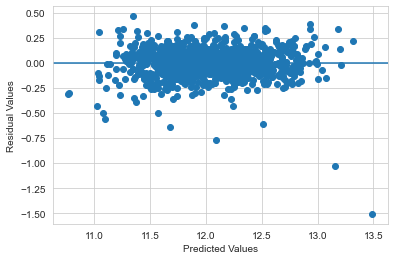

In [93]:
plt.axhline(model_backward.resid.mean())
plt.scatter(model_backward.predict(),model_backward.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residual Values")

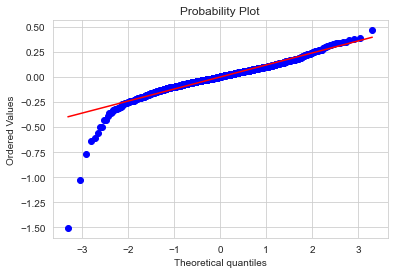

In [94]:
fig = plt.figure()
res = stats.probplot(model_backward.resid, plot=plt)
plt.show()

In [95]:
y_pred = model_backward.predict() 
calculate_metrics(y_train_final, y_pred)


The R2 score for the model is: 0.8988698216655815
Bias for the model is: -5.995204332975845e-15
Mean Squared  Error 0.01612525087416819
Mean Absolute Error 0.08841704576711516
Mean Absolute Percentage Error 0.007389024066964567


# RFEC Feature Selection

In [78]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [79]:
df_train_rfec = X_train_final.copy()
df_train_rfec['SalePrice']  = y_train_final.values

Optimal number of features : 31


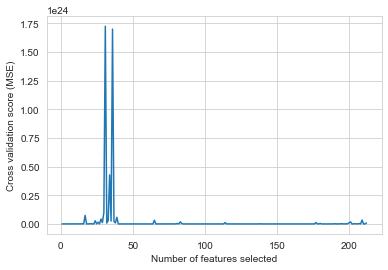

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     228.3
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        03:49:32   Log-Likelihood:                 716.79
No. Observations:                1460   AIC:                            -1354.
Df Residuals:                    1420   BIC:                            -1142.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0241      0.004   3059.500      0.0

In [80]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, make_scorer

mse = make_scorer(mean_squared_error, greater_is_better=True)

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=LinearRegression(normalize=False, n_jobs = -1),
    step=1,
    cv=10,
    scoring=mse,
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train_final, y_train_final)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (MSE)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

# build a model with these selection feature



model_rfecv = smf.ols("SalePrice~" + "+".join(X_train_final.loc[:,rfecv.support_].columns.values),df_train_rfec).fit()
print(model_rfecv.summary())

Text(0, 0.5, 'Residual Values')

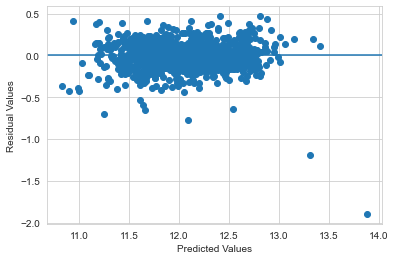

In [81]:
plt.axhline(model_rfecv.resid.mean())
plt.scatter(model_rfecv.predict(),model_rfecv.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residual Values")

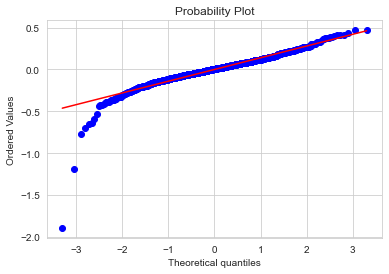

In [82]:
fig = plt.figure()
res = stats.probplot(model_rfecv.resid, plot=plt)
plt.show()

In [83]:
y_pred = model_rfecv.predict() 
calculate_metrics(y_train_final, y_pred)



The R2 score for the model is: 0.8624489477279172
Bias for the model is: -4.107825191113079e-15
Mean Squared  Error 0.021932575047563917
Mean Absolute Error 0.10317911526112274
Mean Absolute Percentage Error 0.008616327296140362


# Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(max_depth=2, random_state=42, min_samples_leaf = 2, min_samples_split = 10 )
clf.fit(X_train_final, y_train_final)



RandomForestRegressor(max_depth=2, min_samples_leaf=2, min_samples_split=10,
                      random_state=42)

In [85]:
import math

y_pred = clf.predict(X_train_final)
print("The R2 score for random forrest is: {}".format(r2_score(y_train_final, y_pred)))

bias = np.mean(y_pred - y_train_final)
print("Bias for the random forrest model is: {}".format(math.e**(bias) -1 ))

print("Mean Squared  Error {}".format(mean_squared_error(y_train_final, y_pred)))
print("Mean Absolute Error {}".format(mean_absolute_error(y_train_final, y_pred)))
print("Mean Absolute Percentage Error {}".format(mean_absolute_percentage_error(y_train_final, y_pred)))


The R2 score for random forrest is: 0.6838967755053611
Bias for the random forrest model is: 0.00023453210916701828
Mean Squared  Error 0.050402796485277915
Mean Absolute Error 0.16758614887766435
Mean Absolute Percentage Error 0.013993499380242505


In [116]:
result = model.summary()

In [117]:
model.params

Intercept    12.017198
a0            0.041774
a1            0.009787
a2            0.046913
a3            0.020472
               ...    
a106          0.000656
a107          0.007059
a108         -0.000227
a109         -0.001904
a110         -0.006540
Length: 112, dtype: float64

## Feature Masking

In [118]:
params = model.params.reset_index().iloc[1:].reset_index(drop=True)

inv_map = {v: k for k, v in dictionary_cols.items()}

for i in range(params.shape[0]):
    
    try:
        print(inv_map[params.loc[i, 'index']], params.loc[i, 'index'],params.iloc[i, 1] )
    except:
        print(inv_map[params.loc[i, 'index'][:-3]], params.loc[i, 'index'],params.iloc[i, 1] )

a4 a0 0.041774454714035514
a5 a1 0.009786954836932316
a7 a2 0.046913234866772846
a8 a3 0.0204716492652971
a9 a4 0.01624626710000157
a10 a5 0.022463340798731468
a12 a6 0.02190498511285613
a14 a7 0.04140989380663442
a19 a8 0.04468329951710043
a20 a9 0.02324813778950305
a21 a10 0.0030517917632943425
a22 a11 -0.021071913735030867
a23 a12 0.07027252766491987
a24 a13 0.035443856615755304
a25 a14 0.01708628762556902
a26 a15 0.012476861774965375
a27 a16 0.0026648422904031466
a28 a17 0.006114558918030449
a29 a18 0.019926964169011227
a30 a19 0.005845402002911282
a31 a20 0.0012803541833837917
a32 a21 -0.00161329301581159
a33 a22 -0.005441643793465276
a35 a23 -0.03676194295900982
a36 a24 0.02298050298930055
a37 a25 0.006797166777206154
a38 a26 0.01724338768190678
a39 a27 -0.007440621622159749
a40 a28 0.0001660285999897093
a41 a29 0.0041252301493718835
a42 a30 -0.0005139505360977625
a43 a31 -0.004660120367060053
a44 a32 -0.0010726254311207578
a45 a33 -0.005764229398193828
a46 a34 0.3146122033888324

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     93.38
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:35:50   Log-Likelihood:                 833.49
No. Observations:                1457   AIC:                            -1447.
Df Residuals:                    1347   BIC:                            -865.7
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.0172      0.004   3231.237      0.0

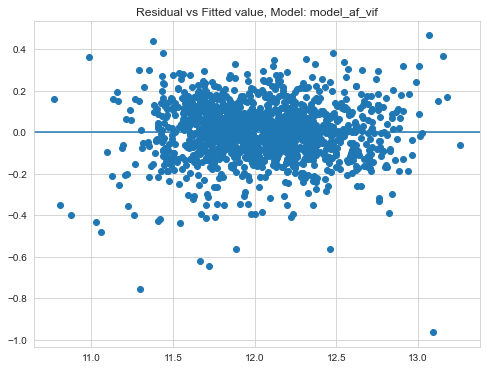

In [119]:
dictionary_cols = dict(zip(df_train_final.loc[:,~df_train_final.columns.isin(['SalePrice'])].columns.values, ["a" +str(i) for i in range(df_train_final.shape[1]-1)]))

df_train_final = df_train_final.rename(columns = dictionary_cols)

df_train_final = df_train_final.astype(str).astype(float)



model = smf.ols("SalePrice~" + "+".join(dictionary_cols.values()),df_train_final).fit()
print(model.summary())

plt.figure(figsize=(8,6))
plt.title("Residual vs Fitted value, Model: model_af_vif")
plt.axhline()
plt.scatter(model.predict(),model.resid)